In [1]:
import sys

sys.path.append("../")

## random walk

In [2]:
import json
import os
from pprint import pprint

from src.graph import TYPES_OF_GRAPH, Graph
from src.sample_dialogue import sample_dialogue

path = '../data'

input_path = os.path.join(path, 'theme_graph.json')
graph_dict = json.load(open(input_path, 'r'))
graph = Graph(graph_dict, TYPES_OF_GRAPH.DI)

sampled_dialogue, sampled_base_graph = sample_dialogue(
    graph.nx_graph,
    start_node=1,
    topic='books'
)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
False


In [3]:
pprint(sampled_base_graph)

{'edges': [{'source': 1,
            'target': 2,
            'theme': 'books',
            'utterances': ['I want to read something.']},
           {'source': 2,
            'target': 4,
            'theme': 'books',
            'utterances': ["I'm looking for non-fiction."]},
           {'source': 4,
            'target': 5,
            'theme': 'books',
            'utterances': ['I enjoy biographies.']},
           {'source': 5,
            'target': 6,
            'theme': 'books',
            'utterances': ['What are the popular books in this genre?']},
           {'source': 6,
            'target': 7,
            'theme': 'books',
            'utterances': ['Any recommendations for authors?']},
           {'source': 7,
            'target': 8,
            'theme': 'books',
            'utterances': ['I never heard about this author, but ihe seems '
                           'interesting']},
           {'source': 8,
            'target': 6,
            'theme': 'books',
        

In [4]:
pprint(sampled_dialogue)

[{'participant': 'assistant',
  'text': 'Do you want to choose a book, a movie, or a game?'},
 {'participant': 'user',
  'source': 1,
  'target': 2,
  'text': 'I want to read something.'},
 {'participant': 'assistant',
  'text': 'How about something from the fiction genre?'},
 {'participant': 'user',
  'source': 2,
  'target': 4,
  'text': "I'm looking for non-fiction."},
 {'participant': 'assistant',
  'text': 'Which genre of non-fiction do you prefer?'},
 {'participant': 'user',
  'source': 4,
  'target': 5,
  'text': 'I enjoy biographies.'},
 {'participant': 'assistant',
  'text': 'Do you want to check out popular books.'},
 {'participant': 'user',
  'source': 5,
  'target': 6,
  'text': 'What are the popular books in this genre?'},
 {'participant': 'assistant',
  'text': 'Sure, this is top-5 books of chose genre'},
 {'participant': 'user',
  'source': 6,
  'target': 7,
  'text': 'Any recommendations for authors?'},
 {'participant': 'assistant', 'text': 'Are there any authors you li

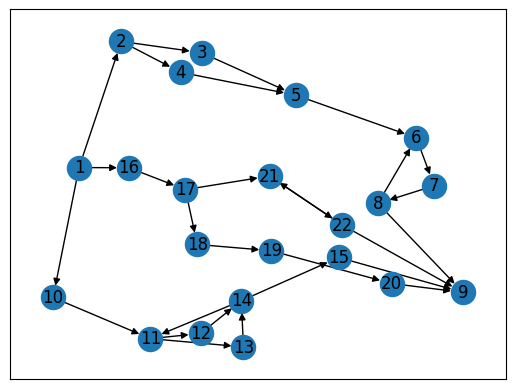

In [17]:
import networkx as nx

nx.draw_networkx(graph.nx_graph)

## all simple paths

In [6]:
paths_generator = nx.all_simple_edge_paths(graph.nx_graph, source=1, target=9)
paths = list(paths_generator)

In [11]:
paths

[[(1, 2), (2, 3), (3, 5), (5, 6), (6, 7), (7, 8), (8, 9)],
 [(1, 2), (2, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)],
 [(1, 10), (10, 11), (11, 12), (12, 14), (14, 15), (15, 9)],
 [(1, 10), (10, 11), (11, 13), (13, 14), (14, 15), (15, 9)],
 [(1, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 9)],
 [(1, 16), (16, 17), (17, 21), (21, 22), (22, 9)]]

In [22]:
from src.sample_dialogue import materialize_dialogue

pprint(materialize_dialogue(graph.nx_graph, paths[3]))

[{'participant': 'assistant',
  'text': 'Do you want to choose a book, a movie, or a game?'},
 {'participant': 'user', 'text': 'Can you recommend a movie?'},
 {'participant': 'assistant',
  'text': 'What genre of movies are you interested in?'},
 {'participant': 'user', 'text': 'Recommend me a horror movie.'},
 {'participant': 'assistant',
  'text': 'These are some highly recommended movies.'},
 {'participant': 'user', 'text': 'Recommend me movies With DiCaprio'},
 {'participant': 'assistant', 'text': 'Sure, there is the list'},
 {'participant': 'user', 'text': 'I want more information on this movie.'},
 {'participant': 'assistant',
  'text': 'Do you know that the director was also an actor?'},
 {'participant': 'user', 'text': "I'll choose this movie."},
 {'participant': 'assistant', 'text': 'I recommend you watch this movie.'},
 {'participant': 'user', 'text': "I'll definitely watch this one."},
 {'participant': 'assistant', 'text': 'It seems like a great choice for you.'}]


## simple cycles

In [23]:
nx.recursive_simple_cycles(graph.nx_graph)

[[6, 7, 8], [11, 12, 14], [11, 13, 14], [21, 22]]